In [1]:
# data manipulation imports
import numpy as np
import pandas as pd

# data saving imports
import pickle
import os

# plotting imports
import matplotlib.pyplot as plt

# custom imports
from reddit_powerlaw import RedditPowerlaw as rpl

In [2]:
# infiles
regression_infile = "thread_classification/regression_classified_thread_data.p"
#thread_infile = 'clean_5_thread_data.p'

# outfiles
outdir = 'thread_classification/truncated_powerlaw_fits'

# make out directory
if not os.path.isdir(outdir):
    os.mkdir(outdir)

In [3]:
# read in files
regression_df = pickle.load(open(regression_infile, 'rb'))

In [4]:
thread_classifications = ['positive', 'neutral', 'negative', 'bipolar']
classified_dfs = {}
for subreddit in regression_df:
    classified_dfs[subreddit] = {}
    df = regression_df[subreddit]
    for key in thread_classifications:
        classified_dfs[subreddit][key] = df[df['quantile'] == key]

In [5]:
reddit_plaw_fits = {}
candidate_distributions = {}
for subreddit in classified_dfs:
    reddit_plaw_fits[subreddit] = {}
    candidate_distributions[subreddit] = {}
    print(f"###{subreddit}###")
    for key in thread_classifications:
        print(f"#{key}#")
        reddit_plaw_fits[subreddit][key] = rpl(
            classified_dfs[subreddit][key].thread_size, name=f'{subreddit}_{key}',
            candidate_distributions=['truncated_power_law'], discrete=True
            )
        candidate_distributions[subreddit][key] = reddit_plaw_fits[subreddit][key].candidate_distributions

###books###
#positive#
#neutral#
#negative#
#bipolar#
###conspiracy###
#positive#
#neutral#
#negative#
#bipolar#
###crypto###
#positive#


Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power la

#neutral#
#negative#
#bipolar#
###politics###
#positive#


Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/py

#neutral#
#negative#
#bipolar#


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /


In [40]:
COLOURS = {
    'positive': "green",
    'neutral': "blue",
    'negative': "red",
    'bipolar': "darkorchid",
}

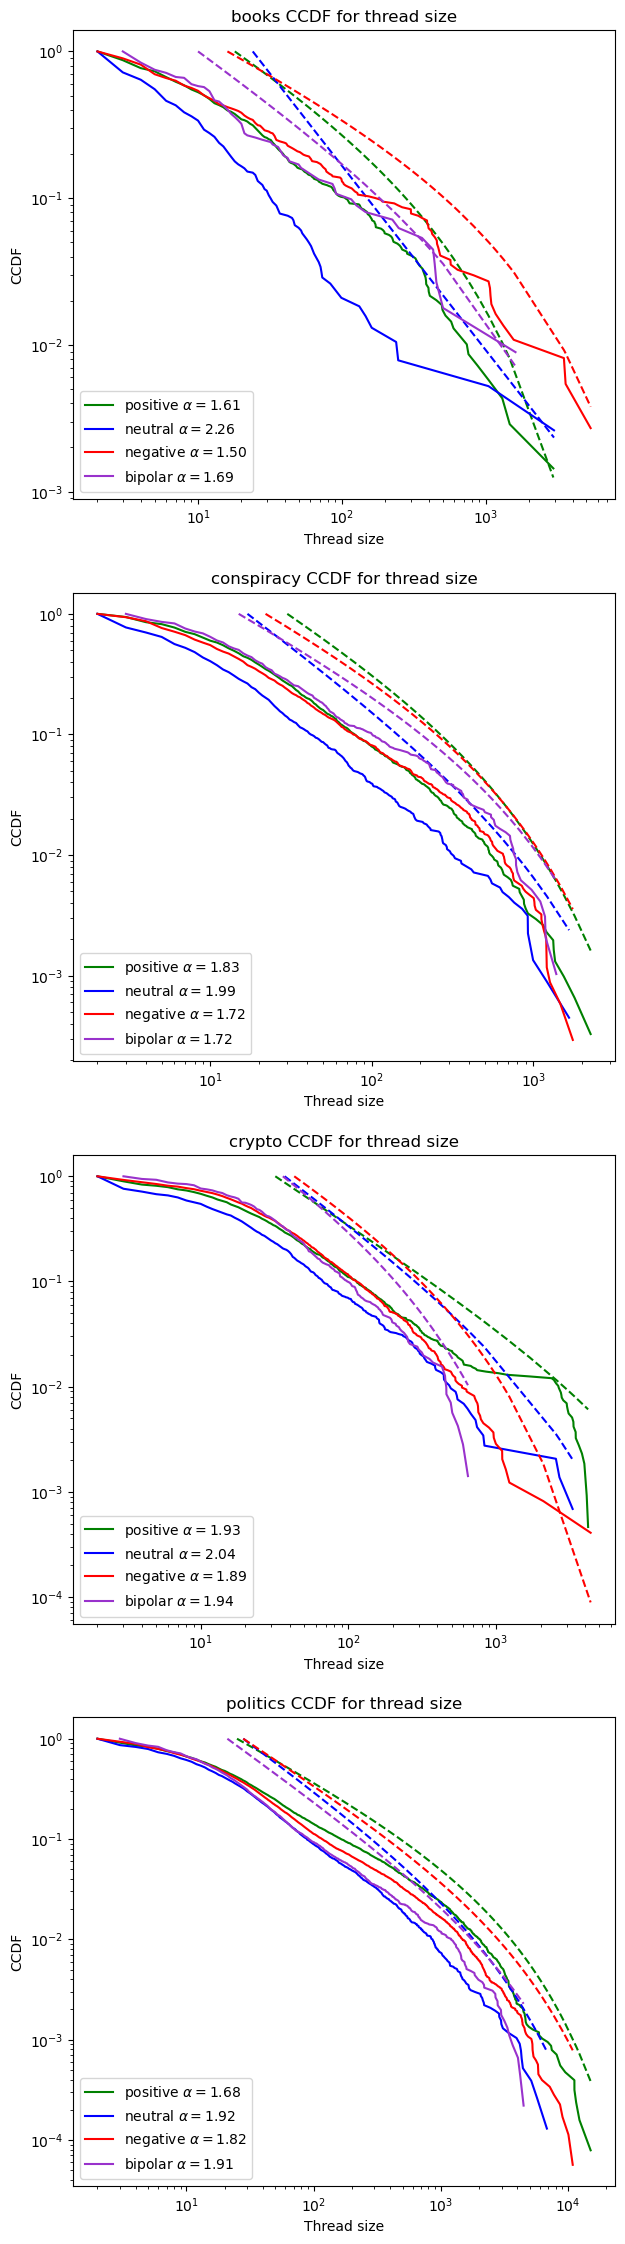

In [83]:
fig, axes = plt.subplots(len(reddit_plaw_fits), figsize=(7, 28))

for i, subreddit in enumerate(reddit_plaw_fits):
    for thread_type in reddit_plaw_fits[subreddit]:
        alpha = reddit_plaw_fits[subreddit][thread_type].fit.truncated_power_law.alpha
        reddit_plaw_fits[subreddit][thread_type].fit.plot_ccdf(
            original_data=True, ax=axes[i], color=COLOURS[thread_type], label=rf'{thread_type} $\alpha={alpha:.2f}$')
        reddit_plaw_fits[subreddit][thread_type].fit.truncated_power_law.plot_ccdf(
            ax=axes[i], linestyle="dashed", color=COLOURS[thread_type])
    axes[i].set_title(f"{subreddit} CCDF for thread size")
    axes[i].set_xlabel(f"Thread size")
    axes[i].set_ylabel(f"CCDF")
    axes[i].legend(loc='lower left')
plt.savefig(f'{outdir}/truncated_powerlaw_fits_all_subreddits.png')
plt.show()

In [137]:
reddit_power_law_fits = {}
power_law_candidate_distributions = {}
for subreddit in classified_dfs:
    reddit_power_law_fits[subreddit] = {}
    power_law_candidate_distributions[subreddit] = {}
    print(f"###{subreddit}###")
    for key in thread_classifications:
        print(f"#{key}#")
        reddit_power_law_fits[subreddit][key] = rpl(
            classified_dfs[subreddit][key].thread_size, name=f'{subreddit}_{key}',
            candidate_distributions=['power_law'], discrete=True
            )
        power_law_candidate_distributions[subreddit][key] = (
            reddit_power_law_fits[subreddit][key].candidate_distributions
        )
    

###books###
#positive#
#neutral#
#negative#
#bipolar#
###conspiracy###
#positive#
#neutral#
#negative#
#bipolar#
###crypto###
#positive#


Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power la

#neutral#
#negative#
#bipolar#
###politics###
#positive#


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


#neutral#
#negative#
#bipolar#


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /


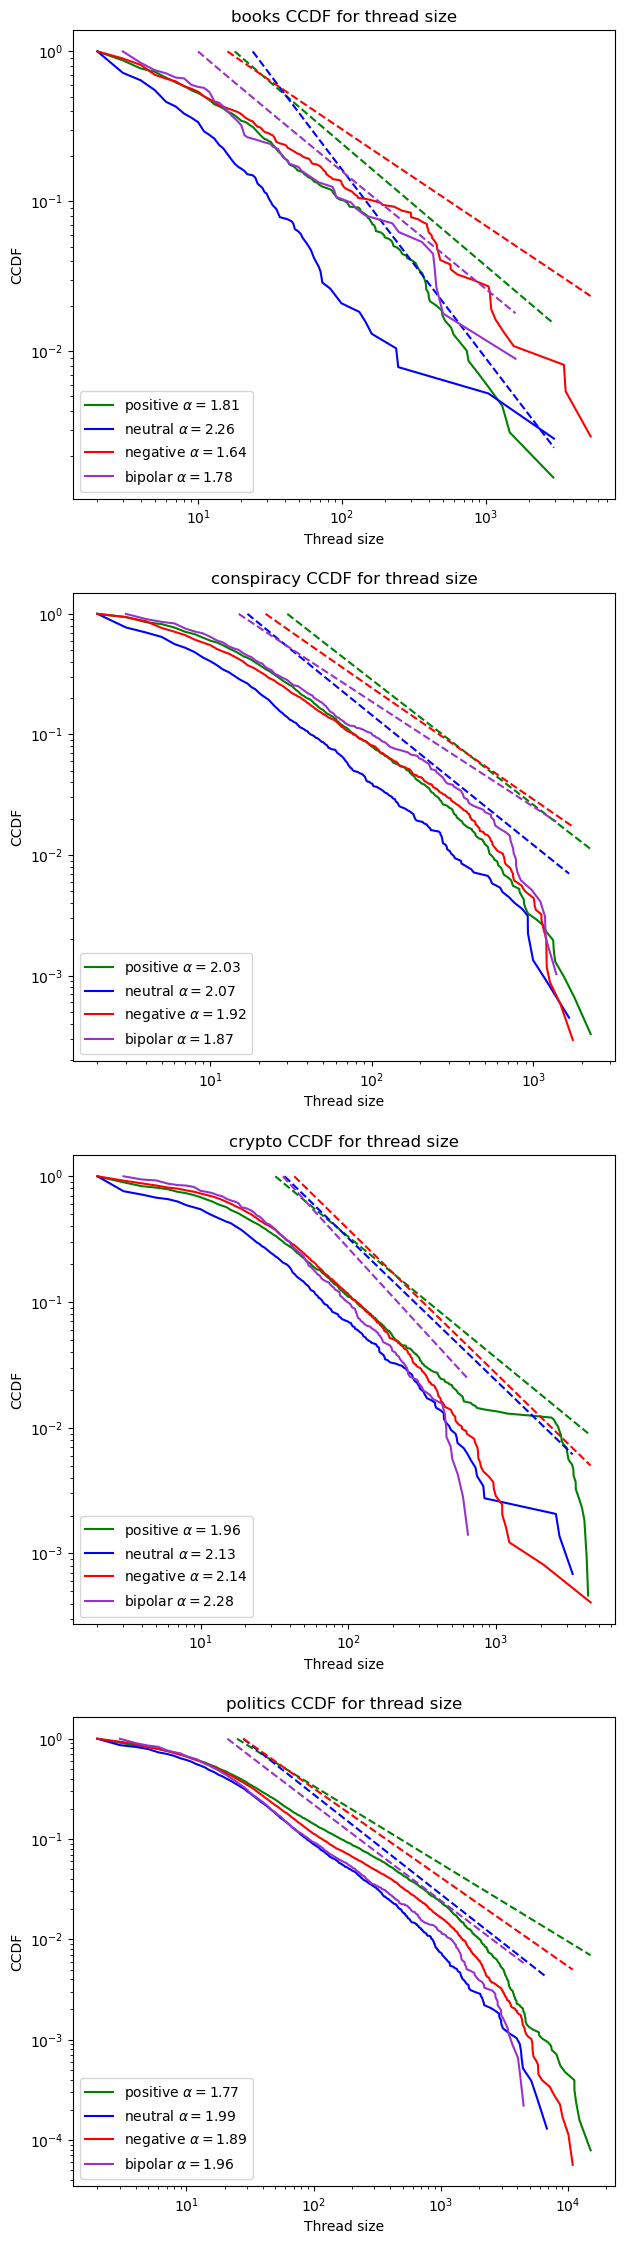

In [100]:
fig, axes = plt.subplots(len(reddit_plaw_fits), figsize=(7, 28))

for i, subreddit in enumerate(reddit_plaw_fits):
    for thread_type in reddit_power_law_fits[subreddit]:
        alpha = reddit_power_law_fits[subreddit][thread_type].fit.power_law.alpha
        reddit_power_law_fits[subreddit][thread_type].fit.plot_ccdf(
            original_data=True, ax=axes[i], color=COLOURS[thread_type], label=rf'{thread_type} $\alpha={alpha:.2f}$')
        reddit_power_law_fits[subreddit][thread_type].fit.power_law.plot_ccdf(
            ax=axes[i], linestyle="dashed", color=COLOURS[thread_type])
    axes[i].set_title(f"{subreddit} CCDF for thread size")
    axes[i].set_xlabel(f"Thread size")
    axes[i].set_ylabel(f"CCDF")
    axes[i].legend(loc='lower left')
plt.savefig(f'{outdir}/powerlaw_fits_all_subreddits.png')
plt.show()

In [138]:
power_law_candidate_params = {}
for subreddit in reddit_plaw_fits:
    power_law_candidate_params[subreddit] = {}
    for thread_type in reddit_power_law_fits[subreddit]:
        distribution_dict = reddit_power_law_fits[subreddit][thread_type].fit.power_law.__dict__.copy()
        distribution_dict['sigma'] = reddit_power_law_fits[subreddit][thread_type].fit.power_law.sigma
        to_remove = ['parent_Fit'] + [f'parameter{j}' for j in [1,2,3]] + [f'parameter{j}_name' for j in [1,2,3]]
        for item in to_remove:
            del distribution_dict[item]
        power_law_candidate_params[subreddit][thread_type] = distribution_dict

/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


In [141]:
power_law_candidate_param_dfs = {}
for subreddit in power_law_candidate_params:
    power_law_candidate_param_dfs[subreddit] = pd.DataFrame.from_dict(power_law_candidate_params[subreddit])


In [142]:
with pd.ExcelWriter(f'{outdir}/power_law_fit_params.xlsx', engine="xlsxwriter") as writer:
    for subreddit in power_law_candidate_param_dfs:
        power_law_candidate_param_dfs[subreddit].to_excel(writer, sheet_name=subreddit)


In [146]:
truncated_plaw_candidate_params = {}
for subreddit in reddit_plaw_fits:
    truncated_plaw_candidate_params[subreddit] = {}
    for thread_type in reddit_plaw_fits[subreddit]:
        distribution_dict = reddit_plaw_fits[subreddit][thread_type].fit.truncated_power_law.__dict__.copy()
        to_remove = ['parent_Fit'] + [f'parameter{j}' for j in [3]] + [f'parameter{j}_name' for j in [3]]
        for item in to_remove:
            del distribution_dict[item]
        truncated_plaw_candidate_params[subreddit][thread_type] = distribution_dict

truncated_plaw_candidate_param_dfs = {}
for subreddit in truncated_plaw_candidate_params:
    truncated_plaw_candidate_param_dfs[subreddit] = pd.DataFrame.from_dict(truncated_plaw_candidate_params[subreddit])

In [147]:
truncated_plaw_candidate_param_dfs['books']

,positive,neutral,negative,bipolar
xmin,18.0,24.0,16.0,10.0
xmax,None,None,None,None
discrete,True,True,True,True
fit_method,Likelihood,Likelihood,Likelihood,Likelihood
discrete_approximation,round,round,round,round
parameter1,1.613647,2.257146,1.496375,1.687352
parameter2,0.000686,0.0,0.000234,0.000366
parameter1_name,alpha,alpha,alpha,alpha
parameter2_name,lambda,lambda,lambda,lambda
alpha,1.613647,2.257146,1.496375,1.687352


In [148]:
with pd.ExcelWriter(f'{outdir}/truncated_power_law_fit_params.xlsx', engine="xlsxwriter") as writer:
    for subreddit in truncated_plaw_candidate_param_dfs:
        truncated_plaw_candidate_param_dfs[subreddit].to_excel(writer, sheet_name=subreddit)